# Explanation of the CNN Implementation for MNIST Dataset

# 1. Data Analysis and Preprocessing

1. **Load the Data:**
   - Import the training, test, and sample submission CSV files using `pandas.read_csv`.
   - This gives us the `train_df`, `test_df`, and `sample_submission` dataframes.

2. **Check for Missing Values:**
   - Use `isnull().sum().sum()` on the dataframes to ensure there are no missing values.
   - This step ensures data integrity before proceeding with analysis.

3. **Visualize Label Distribution:**
   - Use `seaborn.countplot` to plot the distribution of digit labels in the training set.
   - This helps us understand the balance of the classes in the dataset.

4. **Separate Features and Labels:**
   - Extract the pixel values (features) and the labels from the training dataframe.
   - The features are stored in `X` and the labels in `y`.

5. **Normalize Pixel Values:**
   - Scale the pixel values to the range [0, 1] by dividing by 255.
   - Normalization helps in faster convergence of the model during training.

6. **Reshape Data:**
   - Reshape the data into the shape required by the neural network, which is `(28, 28, 1)` for each image.
   - This shape is necessary for the Conv2D layers in the CNN.

7. **Categorical Encoding:**
   - Convert the labels to one-hot encoded format using `tensorflow.keras.utils.to_categorical`.
   - One-hot encoding is necessary for the softmax output layer of the CNN.

8. **Train-Validation Split:**
   - Split the training data into training and validation sets using `train_test_split`.
   - This allows us to evaluate the model on unseen data during training.

# 2. Model Building

1. **Build the CNN Model:**
   - Define a sequential model using `tensorflow.keras.models.Sequential`.
   - Add Conv2D layers for feature extraction, each followed by a MaxPooling2D layer to reduce spatial dimensions.
   - Add Dropout layers to prevent overfitting by randomly setting a fraction of input units to 0.
   - Flatten the output from the convolutional layers to feed into dense layers.
   - Add Dense layers, with the final Dense layer having 10 units (one for each digit) and a softmax activation function for classification.

2. **Compile the Model:**
   - Compile the model with the Adam optimizer, categorical crossentropy loss, and accuracy as the metric.
   - The Adam optimizer is chosen for its efficiency and effectiveness.
   - Categorical crossentropy is used because it is a multi-class classification problem.

# 3. Model Training and Evaluation

1. **Train the Model:**
   - Fit the model on the training data using the `fit` method.
   - Provide the validation data for evaluation during training.
   - Set the number of epochs and batch size.

2. **Evaluate the Model:**
   - Evaluate the model on the validation data using the `evaluate` method.
   - This provides the validation loss and accuracy.

3. **Visualize Training Progress:**
   - Plot the training and validation accuracy using `matplotlib.pyplot.plot`.
   - Plot the training and validation loss.
   - These plots help in understanding the model’s learning progress and whether it is overfitting or underfitting.

# 4. Generate Predictions and Submission File

1. **Predict on Test Data:**
   - Use the trained model to predict labels for the test data using the `predict` method.
   - Convert the predictions to class labels using `np.argmax`.

2. **Create Submission File:**
   - Create a DataFrame with ImageId and the predicted labels.
   - Save the DataFrame to a CSV file in the required format using `to_csv`.



# 1. Data Analysis and Preprocessing

In [1]:
# Load and preprocess MNIST dataset for QCNN
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

2024-08-02 03:24:30.187640: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-02 03:24:30.187782: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-02 03:24:30.368167: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
# Load the data
# It contains 60,000 training images and 10,000 testing images, 
# each of which is a grayscale image of size 28×28 pixels.
train_df = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')
test_df = pd.read_csv('/kaggle/input/digit-recognizer/test.csv')
sample_submission = pd.read_csv('/kaggle/input/digit-recognizer/sample_submission.csv')

In [3]:
# Display the first few rows of the training data
print(train_df.head())

   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         

In [4]:
# Check for missing values
print(train_df.isnull().sum().sum())
print(test_df.isnull().sum().sum())

0
0


In [5]:
train_df['label'].value_counts().sort_index()

label
0    4132
1    4684
2    4177
3    4351
4    4072
5    3795
6    4137
7    4401
8    4063
9    4188
Name: count, dtype: int64

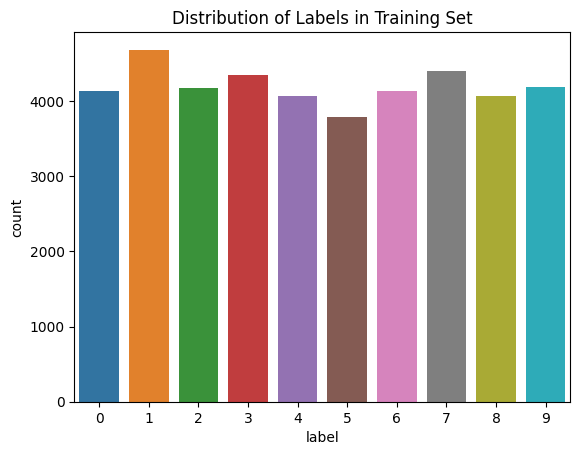

In [6]:
# Visualize the distribution of labels
sns.countplot(x=train_df['label'])
plt.title('Distribution of Labels in Training Set')
plt.show()



In [7]:
# Separate features and labels
X = train_df.drop(columns=['label']).values
y = train_df['label'].values

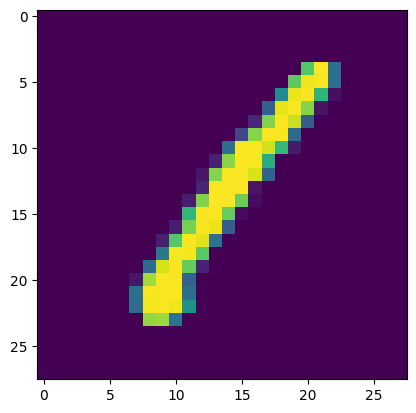

In [8]:
plt.imshow(X[0].reshape(28,28))

In [9]:
# Normalize the pixel values
X = X / 255.0
test_data = test_df.values / 255.0

In [10]:
# Reshape data to fit the model input (28x28x1)
X = X.reshape(-1, 28, 28, 1)
test_data = test_data.reshape(-1, 28, 28, 1)

In [11]:
y

array([1, 0, 1, ..., 7, 6, 9])

In [12]:
# Convert labels to categorical format
# 将整数标签转换为二进制类别矩阵
y = to_categorical(y, num_classes=10)

In [13]:
y

array([[0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [14]:
# Split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Quantum Convolutional Neural Network (QCNN)

In [15]:
# !pip install pennylane

In [16]:
import numpy as np
from tensorflow.keras import layers, models

In [17]:
# Title: Build and compile the Convolutional Neural Network
from tensorflow.keras import layers, models

# Build the CNN model
# Conv2D 层是二维卷积层，用于在图像上应用卷积操作。卷积操作通过在输入图像上滑动一个小的窗口（称为卷积核或滤波器），并计算窗口内像素值与卷积核权重的点积，来提取图像的特征。
# MaxPooling2D 层是二维最大池化层，用于对输入特征图进行下采样。池化操作通过在输入特征图上滑动一个窗口，并取窗口内最大值作为输出，来减少特征图的尺寸。
cnn_model = models.Sequential([
    # 卷积核：通过权重随机初始化，并通过反向传播修正
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the model
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# 3. Visualization

In [18]:
# Title: Train, evaluate, and visualize the CNN model
# 准确率提供了模型预测正确率的直观度量，而损失函数则提供了模型性能的连续度量，用于指导模型训练过程中的参数调整
history = cnn_model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_val, y_val))

Epoch 1/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 19s 32ms/step - accuracy: 0.8128 - loss: 0.5869 - val_accuracy: 0.9746 - val_loss: 0.0781
Epoch 2/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 16s 30ms/step - accuracy: 0.9794 - loss: 0.0678 - val_accuracy: 0.9840 - val_loss: 0.0505
Epoch 3/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 16s 31ms/step - accuracy: 0.9835 - loss: 0.0469 - val_accuracy: 0.9837 - val_loss: 0.0517
Epoch 4/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 16s 30ms/step - accuracy: 0.9902 - loss: 0.0330 - val_accuracy: 0.9854 - val_loss: 0.0461
Epoch 5/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 16s 31ms/step - accuracy: 0.9913 - loss: 0.0286 - val_accuracy: 0.9879 - val_loss: 0.0379
Epoch 6/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 16s 30ms/step - accuracy: 0.9937 - loss: 0.0192 - val_accuracy: 0.9890 - val_loss: 0.0362
Epoch 7/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 16s 31ms/step - accuracy: 0.9943 - loss: 0.0177 - val_accuracy: 0.9876 - val_loss: 0.0367
Epoch 8/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 16s 30ms/step - accuracy: 0.9945 - loss: 0.0170 - 

In [19]:
# Evaluate the model
val_loss, val_accuracy = cnn_model.evaluate(X_val, y_val)
print(f'Validation loss: {val_loss}')
print(f'Validation accuracy: {val_accuracy}')

263/263 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9873 - loss: 0.0417
Validation loss: 0.0351371131837368
Validation accuracy: 0.9888095259666443


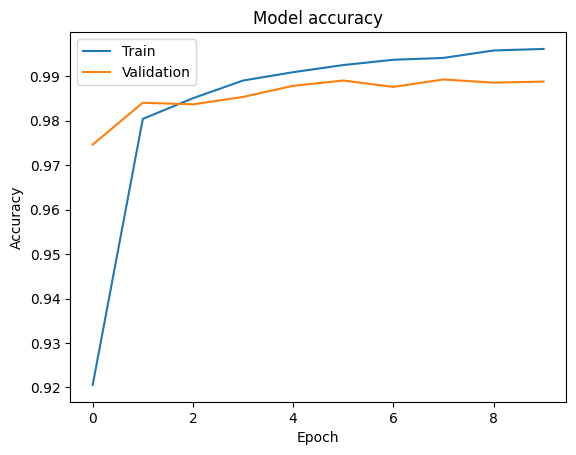

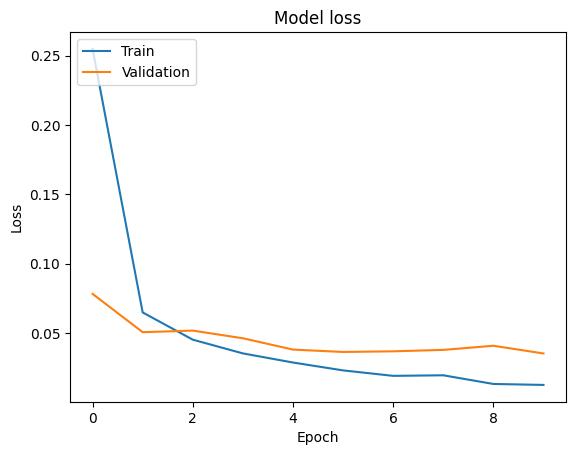

In [20]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# 4. Submission File Generation

In [21]:
# Title: Generate predictions and create submission file
predictions = cnn_model.predict(test_data)
predicted_labels = np.argmax(predictions, axis=1)

submission_df = pd.DataFrame({'ImageId': np.arange(1, len(predicted_labels) + 1), 'Label': predicted_labels})
submission_df.to_csv('submission.csv', index=False)

print(submission_df.head())


875/875 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step
   ImageId  Label
0        1      2
1        2      0
2        3      9
3        4      0
4        5      3


# Summary
This process involves loading and preprocessing the MNIST dataset, building a hybrid Quantum Convolutional Neural Network (QCNN) using Pennylane and TensorFlow, training and evaluating the model, visualizing the training history, and generating a submission file. Each step is crucial for achieving high accuracy in classifying handwritten digits and effectively leveraging quantum computing techniques.